In [81]:
#pip install citipy
import csv
import os
from random import uniform
from random import random
import matplotlib.pyplot as plt
import seaborn as sb
import requests as req
import pandas as pd
import json
from citipy import citipy as cp
import math

In [92]:
#Weather API
api_key = "62262785d73674ea77c4cb358e1f421e"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "IMPERIAL"

#Looking up a city nearest to the equator - test
#city = cp.nearest_city(0, 0)
#print(city)             
#print(city.city_name)
#print(city.country_code)

cities = []
#random number generator for latitude, longitude; set limits -60 lat, 80 lat
def randompoint():
   return uniform(-60, 80), uniform(-90, 90)

points = (randompoint() for x in range(100))
for point in points:
        xlat = point[0]
        ylon = point[1]
        city = cp.nearest_city(xlat, ylon)
        
        if city.city_name not in cities:
            cities.append(city.city_name)

new_cities = cities

In [93]:
print(new_cities)

['hambantota', 'ler', 'ormara', 'hithadhoo', 'iqaluit', 'tucuma', 'saldanha', 'georgetown', 'tsihombe', 'jamestown', 'beterou', 'amderma', 'challapata', 'punta arenas', 'thinadhoo', 'richards bay', 'cape town', 'monrovia', 'witu', 'omboue', 'san cristobal', 'buchanan', 'tasiilaq', 'arraial do cabo', 'hobyo', 'zhanakorgan', 'axim', 'diffa', 'saint-georges', 'necochea', 'humaita', 'karlstad', 'bubaque', 'yar-sale', 'talnakh', 'carauari', 'shache', 'rio grande', 'fort-shevchenko', 'pout', 'wajir', 'qaanaaq', 'lebu', 'dingle', 'sindor', 'tczew', 'orsha', 'ponta do sol', 'voyinka', 'carutapera', 'kavaratti', 'manono', 'ghanzi', 'begichevskiy', 'eenhana', 'padang', 'busselton', 'grand river south east', 'torbay', 'westport', 'clyde river', 'hamilton', 'saint-pierre', 'inhambane', 'illoqqortoormiut', 'tatarsk', 'vila velha', 'filadelfia', 'cockburn town', 'kruisfontein', 'boca do acre', 'wschowa', 'taolanaro', 'hualmay', 'tonj', 'sinnamary', 'ribeira grande', 'umm lajj', 'zhezkazgan', 'vodnyy

In [99]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
weather_data = [req.get(query_url + city).json() for city in new_cities]
print(json.dumps(weather_data, indent=2))

[
  {
    "coord": {
      "lon": 81.12,
      "lat": 6.12
    },
    "weather": [
      {
        "id": 500,
        "main": "Rain",
        "description": "light rain",
        "icon": "10d"
      }
    ],
    "base": "stations",
    "main": {
      "temp": 77.93,
      "pressure": 1018.39,
      "humidity": 100,
      "temp_min": 77.93,
      "temp_max": 77.93,
      "sea_level": 1021.01,
      "grnd_level": 1018.39
    },
    "wind": {
      "speed": 11.21,
      "deg": 256.5
    },
    "rain": {
      "3h": 0.17
    },
    "clouds": {
      "all": 80
    },
    "dt": 1503450699,
    "sys": {
      "message": 0.0029,
      "country": "LK",
      "sunrise": 1503448189,
      "sunset": 1503492383
    },
    "id": 1244926,
    "name": "Hambantota",
    "cod": 200
  },
  {
    "coord": {
      "lon": 30.14,
      "lat": 8.3
    },
    "weather": [
      {
        "id": 500,
        "main": "Rain",
        "description": "light rain",
        "icon": "10n"
      }
    ],
    "base": "st

In [104]:
csv_data = []

for data in weather_data:
    cities_name = data.get("name")
    cloud_data = data.get("clouds", {}).get("all", 0)
    country_data = data.get("sys", {}).get("country", "Unknown")
    date_data = [data.get("dt", 0) for data in weather_data]
    lat_data = data.get("coord", {}).get("lat", 0)
    lon_data = data.get("coord", {}).get("lon", 0)
    humidity_data = data.get("main", {}).get("humidity", 0)
    maxtemp_data = data.get("main", {}).get("temp_max", 0)

    single_row = [cities_name,cloud_data,country_data,date_data,lat_data,lon_data,humidity_data,maxtemp_data]
    csv_data.append(single_row)
    
root_path = os.path.join(os.getcwd())
data_path = os.path.join(root_path)
csvpath = os.path.join(root_path, "weather_data.csv")
with open(csvpath, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=",")
    csvwriter.writerow(["City Name", "Cloudiness", "Country", "Date", "Latitude","Longitude","Humidity","Max Temp"])
    csvwriter.writerow(csv_data)

In [102]:
cloud_data = [data.get("clouds", {}).get("all", 0) for data in weather_data]
country_data = [data.get("sys", {}).get("country", "Unknown") for data in weather_data]
date_data = [data.get("dt", 0) for data in weather_data]
lat_data = [data.get("coord").get("lat") for data in weather_data]
lon_data = [data.get("coord").get("lon") for data in weather_data]
humidity_data = [data.get("main", {}).get("humidity", 0) for data in weather_data]
maxtemp_data = [data.get("main", {}).get("temp_max", 0) for data in weather_data]
windspeed_data = [data.get("wind", {}).get("speed", 0) for data in weather_data]

In [103]:
print(len(new_cities))
print(len(cloud_data))
print(len(country_data))
print(len(date_data))
print(len(lat_data))

83
83
83
83
83


In [96]:
weather_data = pd.DataFrame(
    {
        "City": new_cities,
        "Cloudiness": cloud_data,
        "Country": country_data,
        "Date": date_data,
        "Humidity": humidity_data,
        "Lat": lat_data,
        "Lon": lon_data,
        "Max Temp": maxtemp_data,
        "Wind Speed": windspeed_data
    }
)

weather_data.head()

root_path = os.path.join(os.getcwd())
data_path = os.path.join(root_path)
csvpath = os.path.join(root_path, "weather_data.csv")
with open(csvpath, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=",")
    csvwriter.writerow([new_cities,cloud_data,country_data,date_data,humidity_data,lat_data,lon_data,maxtemp_data,windspeed_data])

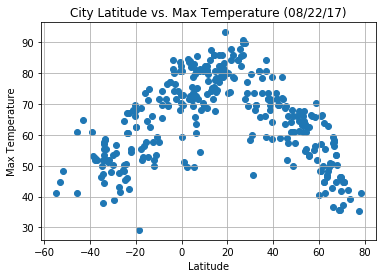

In [55]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature (08/22/17)")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latvstemp")
plt.show()

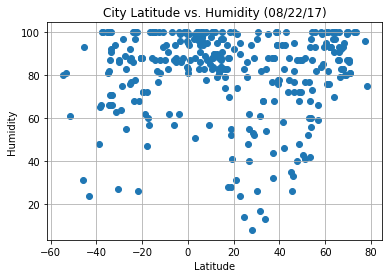

In [58]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity (08/22/17)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latvshumid")
plt.show()

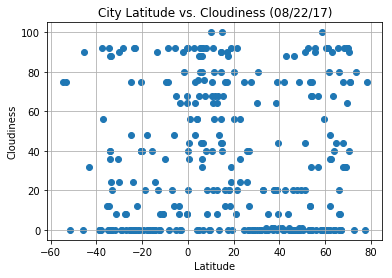

In [60]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness (08/22/17)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("latvscloud")
plt.show()

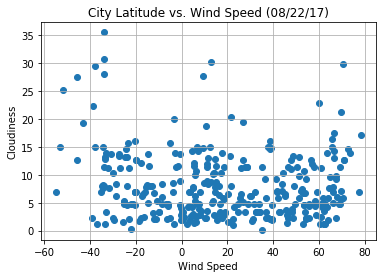

In [61]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed (08/22/17)")
plt.ylabel("Cloudiness")
plt.xlabel("Wind Speed")
plt.grid(True)

plt.savefig("latvswind")
plt.show()